In [9]:
import numpy as np
import pandas as pd

In [25]:
dt = pd.read_csv("diabetes.csv")
dt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
dt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
# Independent Variables
X=dt[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
# Dependent variable 
Y=dt['Outcome']


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Split the Data (80% Training, 20% Testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display Results
print("Training Features (X_train):\n", X_train)
print("\nTesting Features (X_test):\n", X_test)
print("\nTraining Labels (Y_train):\n", Y_train)
print("\nTesting Labels (Y_test):\n", Y_test)

Training Features (X_train):
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   
..           ...      ...            ...            ...      ...   ...   
71             5      139             64             35      140  28.6   
106            1       96            122              0        0  22.4   
270           10      101             86             37        0  45.6   
435            0      141              0              0        0  42.4   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618    

In [15]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

GaussianNB()

In [16]:
Y_pred = gaussian.predict(X_test)
print(Y_pred)

[0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0]


In [17]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score

In [18]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[79 20]
 [16 39]]


In [19]:
accuracy = accuracy_score(Y_test,Y_pred)
precision =precision_score(Y_test, Y_pred,average='micro')
recall = recall_score(Y_test, Y_pred,average='micro')
print("accuracy : ",accuracy)
print("precision : ",precision)
print("recall : ",recall)

accuracy :  0.7662337662337663
precision :  0.7662337662337663
recall :  0.7662337662337663


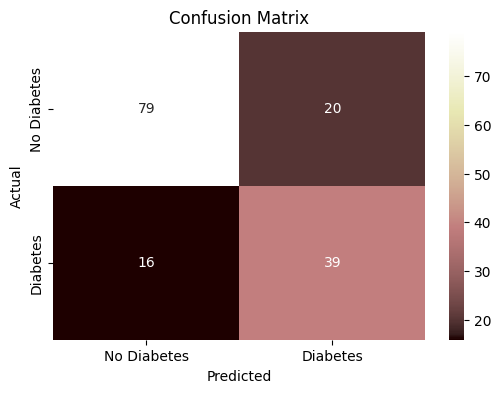

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()